**30E03000 - Data Science for Business I (2022)**

# Tutorial 1: Detecting fraudulent insurance claims with decision tree

### Learning goals

In this exercise, you will learn how to detect fraudulent insurance claims using decision trees in Python.

### Business Problem

1. Insurance claims are a major target for fraud, both opportunistic as well as planned/organized.
2. The costs of fraudulent claims can be substantial.
3. Manual examination of the claims is impractical and expensive due to large volume of insurance claims.

**Thus, the goal is to identify and flag fraudulent claims early in their life cycle.**


### Keywords
`fraud detection`, `decision trees`, `exploratory data analysis (EDA)`, `data visualization`, `data preprocessing`

### Tutorial structure

<img src="Images/Flow.png" width="1000">

## Import libraries

In [40]:
import numpy as np #scientific computing
import pandas as pd #data management
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.model_selection import train_test_split #Data split function
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

#Decision tree plot
import pydotplus
from IPython.display import Image

## 1. Load data

First, we load the data from a .txt file and store it in a Pandas data frame. A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet (Excel) or SQL table. It is generally the most commonly used Pandas object [1]. 

In [5]:
data = pd.read_csv('insurance_fraud_data.txt') #ensure .ipynb notebook is in the same folder as the data set
data.head() #returns the first 5 rows; remove .head() to see the entire dataset

,claim_id,customer_id,age,gender,incident_cause,days_to_incident,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,32,Female,Driver error,225,Auto,No,Material only,2980.0,1,No
1,33985796,75740424,60,Female,Crime,11874,Home,Unknown,Material only,2980.0,3,No
2,53522022,30308357,27,Female,Other driver error,4,Auto,No,Material only,3369.5,1,Yes
3,13015401,47830476,39,Female,Natural causes,5278,Auto,No,Material only,1680.0,1,No
4,22890252,19269962,47,Male,Crime,2335,Auto,No,Material only,2680.0,1,No


## 2. Exploratory data analysis (EDA)
Second, we perform some exploratory data analysis (EDA) to better understand the structure, variables types, and values we are dealing with.

1. Let's check the shape (rows and columns) of the dataset

In [6]:
data.shape

(1100, 12)

The dataset has 1100 rows (entries/instances/observations) and 12 columns (features). 

2. Next we get some information about the dataset

In [7]:
data.info() #this command will reveal missing values, NaN values and variable types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   age                  1100 non-null   int64  
 3   gender               1100 non-null   object 
 4   incident_cause       1100 non-null   object 
 5   days_to_incident     1100 non-null   int64  
 6   claim_area           1100 non-null   object 
 7   police_report        1100 non-null   object 
 8   claim_type           1100 non-null   object 
 9   claim_amount         1100 non-null   float64
 10  total_policy_claims  1100 non-null   int64  
 11  fraudulent           1100 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 103.2+ KB


We observe:
- No missing values (all variables show 1100 entries)
- no NaN values 
- mostly int and float values, but also some object/strings (these require further attention)

3. Finally we can output some descriptive statistics

In [8]:
data.describe().round() #this command will provide basic statistics for all numeric variables

,claim_id,customer_id,age,days_to_incident,claim_amount,total_policy_claims
count,1100.0,1100.0,1100.0,1100.0,1100.0,1100.0
mean,48838190.0,50874698.0,48.0,2814.0,12318.0,2.0
std,29188060.0,28461020.0,18.0,2785.0,13688.0,1.0
min,26832.0,154557.0,18.0,2.0,1000.0,1.0
25%,23815805.0,26791756.0,33.0,636.0,1880.0,1.0
50%,48539331.0,49855152.0,47.0,2042.0,2750.0,1.0
75%,74074466.0,75949511.0,63.0,4154.0,23965.0,2.0
max,99775483.0,99961993.0,79.0,14991.0,48150.0,8.0


## 3. Data visualization

We generate several plots to gain a better understanding of the data and its distribution. Note that there is no fixed guideline of what (or how) to plot. Think "what would be interesting to see" or "what would help me to better understand the data".

#### Fraud vs. no fraud: absolute & relative distribution
The first plot visually compares the absolute and relative distribution of fraudulent vs. non-fraudulent cases. 

#### Option 1: Standard pandas plotting

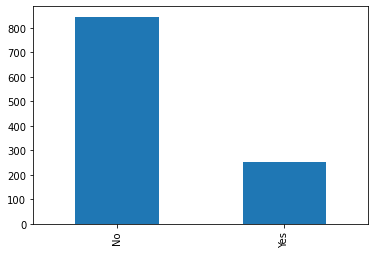

In [9]:
ax = data['fraudulent'].value_counts().plot(kind='bar')

#ax.set_xlabel('is fraud?')
#ax.set_ylabel('Count')

#### Option 2: Make it look nice for potential stakeholders, presentations, your online portfolio, etc.

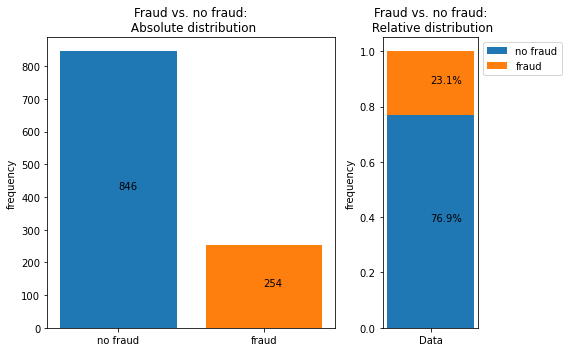

In [10]:
# plot fraud vs. non-fraud 
keys, counts = np.unique(data.fraudulent, return_counts=True)
counts_norm = counts/counts.sum()

fig = plt.figure(figsize=(8, 5)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['no fraud', 'fraud'], counts, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Fraud vs. no fraud:\n Absolute distribution') 
ax0 = plt.ylabel('frequency')
ax0 = plt.text(['no fraud'], counts[0]/2, counts[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(['fraud'], counts[1]/2, counts[1]) #add text box with count of fraudulent cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Data'], [counts_norm[0]], label='no fraud')
ax1 = plt.bar(['Data'], [counts_norm[1]], bottom=counts_norm[0], label='fraud')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Fraud vs. no fraud:\n Relative distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Data'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Data'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

We observe that the non-fraudulent cases account for about 77% of all observations. This <font color='red'>**imbalanced distribution**</font> of the response variable (`fraudulent`) occurs in many real-life Data Science problems and requires careful consideration when designing a classification model.


<img src="Images/Thanos.png" width="400">

Aaaah...nope...

#### Fraudulent vs. non-fraudulent cases by incident cause

Next, we plot the fraudulent vs. non-fraudulent cases and group them by the reported incident cause.

#### Option 1: Standard pandas plotting

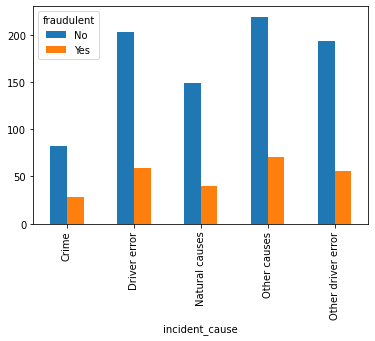

In [11]:
ax = data.groupby(['incident_cause', 'fraudulent'])['fraudulent'].count().unstack().plot.bar()

#### Option 2: Make it look nice for potential stakeholders, presentations, your online portfolio, etc.

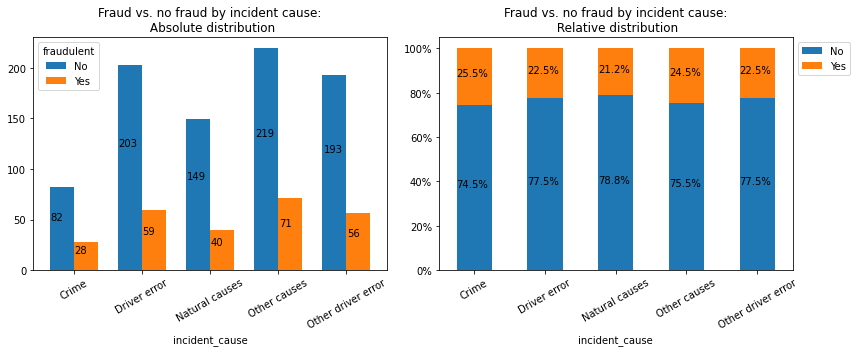

In [12]:
#frauds by incident cause
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['incident_cause', 'fraudulent'])['fraudulent'].count().unstack().plot.bar(rot=30, ax=plt.gca(), width=0.7)
plt.title('Fraud vs. no fraud by incident cause:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['incident_cause','fraudulent'])['fraudulent'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=30, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Fraud vs. no fraud by incident cause:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:5], ax2.patches[5:10]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x(), p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x(), q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

We observe an almost equal distribution of fraudulent vs. non-fraudulent cases amongst the 5 incident causes. Thus, the variable `incident_cause` is probably not a good predictor for the "fraudulentness" of a claim.

#### Days to incident distribution

Next, we plot the relative distribution of days to incident (the time that has elapsed between signing the insurance policy and when the first claim was reported). 

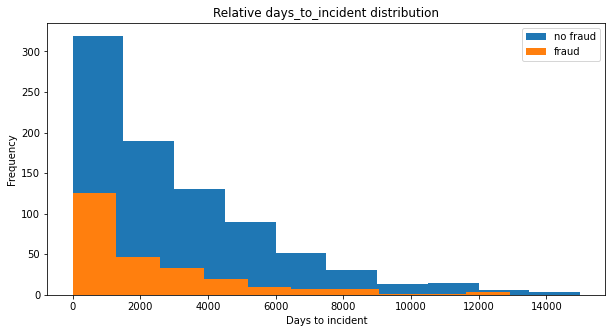

In [13]:
ax = data['days_to_incident'].loc[data['fraudulent'] == 'No'].plot.hist(bins=10, label='no fraud', figsize = (10,5))
ax = data['days_to_incident'].loc[data['fraudulent'] == 'Yes'].plot.hist(bins=10, label='fraud')
ax.set_xlabel('Days to incident')
ax.set_title('Relative days_to_incident distribution')
ax.legend();

Fraudulent cases appear to be reported closer to the signing day. 

#### Fraudulent vs. non-fraudulent cases by claim area

Next, we plot the fraudulent vs. non-fraudulent cases and group them by the reported claim area (either *auto* or *home*).

#### Option 1: Standard pandas plotting

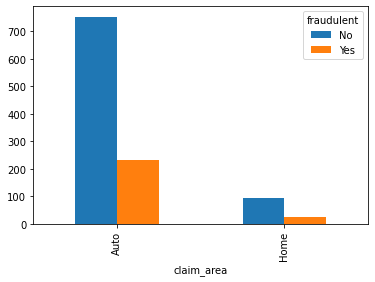

In [14]:
ax = data.groupby(['claim_area', 'fraudulent'])['fraudulent'].count().unstack().plot.bar()

#### Option 2: Make it look nice for potential stakeholders, presentations, your online portfolio, etc.

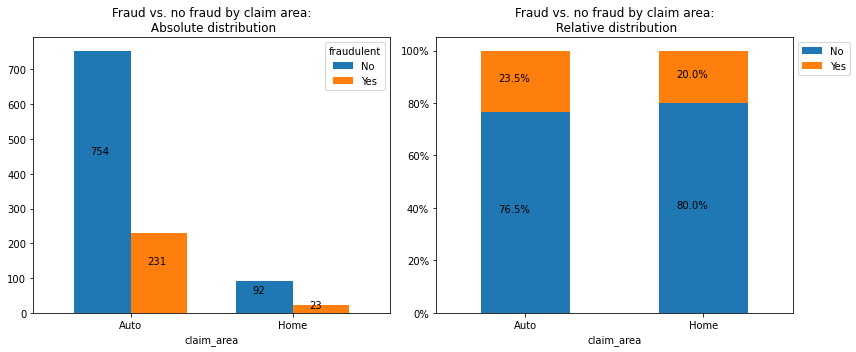

In [15]:
#frauds by claim area
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['claim_area', 'fraudulent'])['fraudulent'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Fraud vs. no fraud by claim area:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() +0.1, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['claim_area','fraudulent'])['fraudulent'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Fraud vs. no fraud by claim area:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:2], ax2.patches[2:4]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.1, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.1, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

Again, we observe an almost equal distribution of fraudulent vs. non-fraudulent cases amongst the 2 claim areas "auto" and "car". Thus, the variable `claim_area` is probably not a good predictor for the "fraudulentness" of a claim.

#### Fraudulent vs. non-fraudulent cases by claim type

Next, we plot the fraudulent vs. non-fraudulent cases and group them by the reported claim type (*injury only*, *Material and injury* or *Material only*).

#### Option 1: Standard pandas plotting

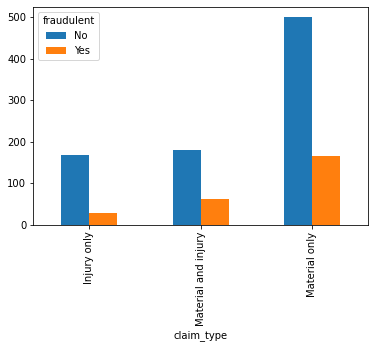

In [16]:
ax = data.groupby(['claim_type', 'fraudulent'])['fraudulent'].count().unstack().plot.bar()

#### Option 2: Make it look nice for potential stakeholders, presentations, your online portfolio, etc.

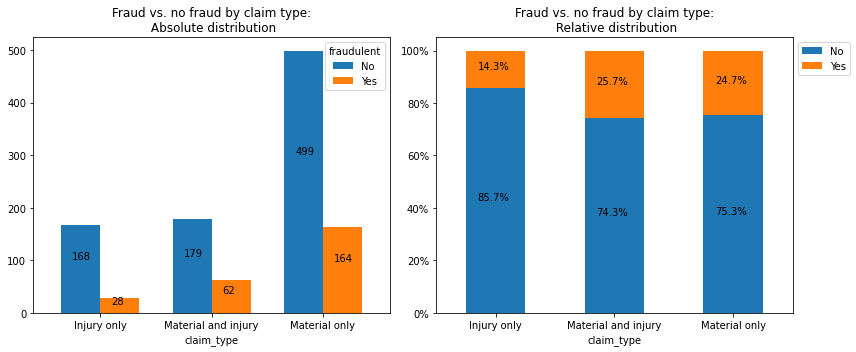

In [17]:
#frauds by claim area
fig = plt.figure(figsize=(12, 5)) #specify figure size

#Absolute distribution
plt.subplot(1, 2, 1)
ax1 = data.groupby(['claim_type', 'fraudulent'])['fraudulent'].count().unstack().plot.bar(rot=0, ax=plt.gca(), width=0.7)
plt.title('Fraud vs. no fraud by claim type:\n Absolute distribution') 
#plot bar labels
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() +0.1, p.get_height() * 0.605))

#Relative distribution
plt.subplot(1, 2, 2)
ax2 = data.groupby(['claim_type','fraudulent'])['fraudulent'].size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, rot=0, ax=plt.gca())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Fraud vs. no fraud by claim type:\n Relative distribution') 
#plot bar labels
for p, q in zip(ax2.patches[0:3], ax2.patches[3:6]):
    ax2.annotate(str(round(p.get_height(),1)) + '%', (p.get_x()+0.1, p.get_height()/2))
    ax2.annotate(str(round(q.get_height(),1)) + '%', (q.get_x()+0.1, q.get_height()/2+p.get_height()))

plt.tight_layout()
plt.show()

We observe a higher proportion of fraudulent claims in the "Material and injury" and "Material only" claim type. It appears that more people try to scam the insurance company with some sort of material-related claims. 

#### Claim amount distribution

Lastly, we plot the relative claim amount distribution of fraudulent and non-fraudulent cases. 

#### Option 1: Standard pandas plotting

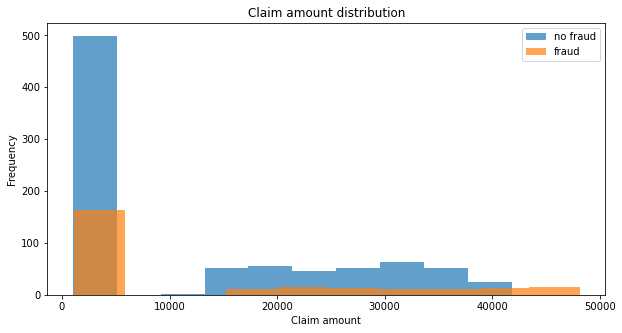

In [18]:
ax = data['claim_amount'].loc[data['fraudulent'] == 'No'].plot.hist(bins=10, alpha=0.7, label='no fraud', figsize = (10,5))
ax = data['claim_amount'].loc[data['fraudulent'] == 'Yes'].plot.hist(bins=10, alpha=0.7, label='fraud')
ax.set_xlabel('Claim amount')
ax.set_title('Claim amount distribution')
ax.legend();

We observe a slightly higher proportion of fraudulent cases in the first bin of up to ca. 4100€. Moreover, we see that fraudulent claims account for most of the highest claims. Above 40,000€, there are only frauds. The plot suggests that `claim amount` might be an important variable in predicting fraudulent cases.

## 4. Data cleaning & pre-processing

The data cannot be passed to the Decision Tree classifier in its current state. It requires some preprocessing.

In [19]:
data.head()

,claim_id,customer_id,age,gender,incident_cause,days_to_incident,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,32,Female,Driver error,225,Auto,No,Material only,2980.0,1,No
1,33985796,75740424,60,Female,Crime,11874,Home,Unknown,Material only,2980.0,3,No
2,53522022,30308357,27,Female,Other driver error,4,Auto,No,Material only,3369.5,1,Yes
3,13015401,47830476,39,Female,Natural causes,5278,Auto,No,Material only,1680.0,1,No
4,22890252,19269962,47,Male,Crime,2335,Auto,No,Material only,2680.0,1,No


### Remove variables that have no explanatory power

The variables `claim_id` and `customer_id` are used by the insurance company as identifiers. They have no explantory power and might actually mislead the Decision Tree algorithm. We remove the variables to keep the data sparse:

In [20]:
data = data.drop(['claim_id', 'customer_id'], axis=1) #axis=1 drops a column (axis=0 drops a row)
data.head()

,age,gender,incident_cause,days_to_incident,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,32,Female,Driver error,225,Auto,No,Material only,2980.0,1,No
1,60,Female,Crime,11874,Home,Unknown,Material only,2980.0,3,No
2,27,Female,Other driver error,4,Auto,No,Material only,3369.5,1,Yes
3,39,Female,Natural causes,5278,Auto,No,Material only,1680.0,1,No
4,47,Male,Crime,2335,Auto,No,Material only,2680.0,1,No


In [21]:
data.shape #note that we now have 10 instead of 12 columns

(1100, 10)

### Encode categorical variables

The scikit-learn Decision Tree algorithm uses only numerical features, which are always interpreted as *continuous numeric variables*. We print the variable types and see that `gender`, `incident_cause`, `claim_area`, `police_report`, `claim_type`, and `fraudulent` are of type object (they are strings). Thus, we have to encode the strings to make them readable for the Decision Tree model.

In [22]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1100 non-null   int64  
 1   gender               1100 non-null   object 
 2   incident_cause       1100 non-null   object 
 3   days_to_incident     1100 non-null   int64  
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1100 non-null   float64
 8   total_policy_claims  1100 non-null   int64  
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 86.1+ KB


One approach to encoding categorical values is to use a technique called **label encoding**. Label encoding is simply converting each value in a column to a number. For example, the `fraudulent` column contains 2 different values that can be encoded as:
- No -> 0
- Yes -> 1

This technqiue works well for the target variable.

In [23]:
cleanup_nums = {"fraudulent": {"No": 0, "Yes": 1}}
data.replace(cleanup_nums, inplace=True)
data.head() #note how the fraudulent 

,age,gender,incident_cause,days_to_incident,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,32,Female,Driver error,225,Auto,No,Material only,2980.0,1,0
1,60,Female,Crime,11874,Home,Unknown,Material only,2980.0,3,0
2,27,Female,Other driver error,4,Auto,No,Material only,3369.5,1,1
3,39,Female,Natural causes,5278,Auto,No,Material only,1680.0,1,0
4,47,Male,Crime,2335,Auto,No,Material only,2680.0,1,0


In [24]:
data.corr()

,age,days_to_incident,claim_amount,total_policy_claims,fraudulent
age,1.000000,0.640207,-0.005397,0.063930,-0.112574
days_to_incident,0.640207,1.000000,-0.045448,0.016872,-0.123528
claim_amount,-0.005397,-0.045448,1.000000,-0.012472,0.022501
total_policy_claims,0.063930,0.016872,-0.012472,1.000000,0.077838
fraudulent,-0.112574,-0.123528,0.022501,0.077838,1.000000


<font color='red'>**However, this naive technique of replacing strings with a hash code should be avoided for the explanatory variables!**</font>

Because the Decision Tree interprets numbers as continuous numerical features, any coding you will use will induce an order which simply does not exist in the data. One example is to code ['red','green','blue'] with [1,2,3], would produce weird things like 'red' is lower than 'blue', and if you average a 'red' and a 'blue' you will get a 'green'. 

A common alternative approach is called **one hot encoding**. The basic strategy is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

Pandas supports this feature using `get_dummies`. This function is named this way because it creates dummy/indicator variables (aka 1 or 0).

Hopefully a simple example will make this more clear. We can look at the column `incident_cause` where we have values of "driver error", "Crime", "Other driver error", "Natural causes", and "Other cuases". By using `get_dummies` we can convert this to 5 columns with a 1 or 0 corresponding to the correct value:

In [25]:
data = pd.get_dummies(data, columns=["gender", "incident_cause", "claim_area", "police_report", "claim_type"], 
                      prefix=["gender", "cause", "area", "report", "type"]) #we add a prefix for easier identification

data.head().style

,age,days_to_incident,claim_amount,total_policy_claims,fraudulent,gender_Female,gender_Male,cause_Crime,cause_Driver error,cause_Natural causes,cause_Other causes,cause_Other driver error,area_Auto,area_Home,report_No,report_Unknown,report_Yes,type_Injury only,type_Material and injury,type_Material only
0,32,225,2980.000000,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
1,60,11874,2980.000000,3,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1
2,27,4,3369.500000,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1
3,39,5278,1680.000000,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,47,2335,2680.000000,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1


## 5. Data split

In general, we want our Decision Tree classification model to perform well on new, unseen data; not just on the dataset we have available. To simulate this, we split our dataset into two subsets: **training** and **testing**. We use the training partition to build the model and the testing partition to evaluate the model performance. 

Ideally, the model performance should not be too different between the training and testing splits. A model that shows similiar performance on the training and testing split generalizes well to new data. A model that performans significantly worse on testing is likely subject to overfitting. 

<img src="Images/Split.jpg" width="300">


 

We split the data 70:30 into a training (`data_train`) and a testing (`data_test`) partition. Furthermore, we split the dataset into a feature **matrix X** (all columns, except the target fraudulent column) and a **label vector y** (only the fraudulent column).

In [26]:
X, y = data.loc[:, data.columns != 'fraudulent'], data['fraudulent'] #define feature matrix X and labels y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12345) #split data 70:30

We visualize the split to ensure that the distribution of fraudulent to non-fraudulent cases matches the distribution in the full dataset.

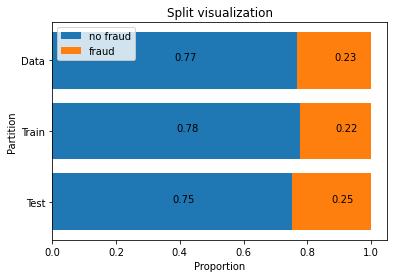

In [27]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = data['fraudulent'].value_counts() / len(data)

fig, ax = plt.subplots()

ax.barh(['Test','Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='no fraud')
ax.barh(['Test','Train','Data'], [test_dist[1], train_dist[1], data_dist[1]], left=[test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='fraud')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['Test', 'Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], [test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

The distribution of fraudulent to non-fraudulent cases is almost equal to the distribution of the original, whole data set (there will always be a slight deviation). We conclude that the split was succesful and move on to building a model.

## 6. Model building

We define a new Decision Tree classifier `clf` and set some basic default settings:
- The function to measure the quality of a split (either “gini” for the Gini impurity and “entropy” for the information gain). We set `criterion = 'gini'` 
- The maximum depth of the tree `max_depth=3`
- The minimum number of samples required to split an internal node `min_samples_leaf=3`

Then, we fit the classifier to the data.


In [28]:
#Define Decision tree classifier with some default parameters
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3)

#Fit the training data 
clf.fit(X_train, y_train) #what do we need here?

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=100)

After the classifier `clf` has been trained on the training data (`X_train`, `y_train`), we make predictions by using the unseen test data `X_test`.

In [29]:
#Use classifier to predict labels
y_pred = clf.predict(X_test) #what do we need here?

In [30]:
#probabilities
y_pred_probs = clf.predict_proba(X_test)

Fontconfig error: Cannot load default config file: No such file: (null)



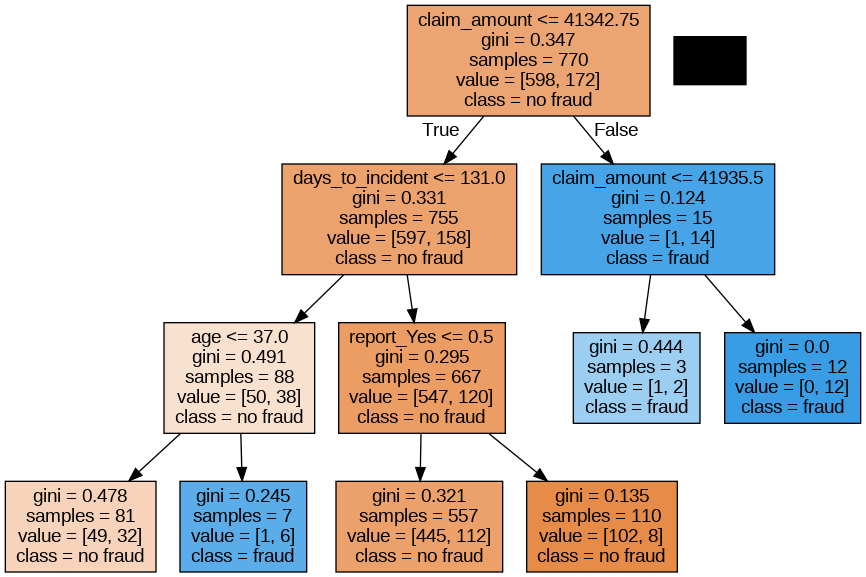

In [31]:
'''
The graphviz library is used to visualize the tree. 
'''

#Decision tree plot
import pydotplus
from IPython.display import Image 

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['no fraud', 'fraud'], filled=True) #or use y_train.unique()

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 

# Show graph
Image(graph.create_png())

# Create PNG 
#graph.write_png("clf.png") #uncomment this line to save the plot as a .png file

We do some magic to visualize the relative importance of the different features. 

In [32]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_order = np.array([X.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]

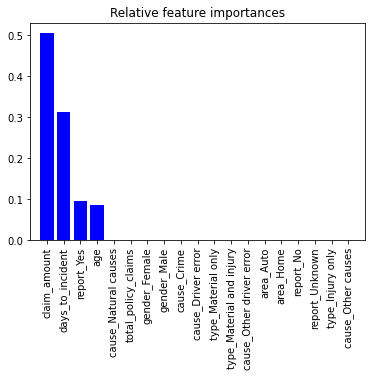

In [33]:
# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b",  align="center")
plt.xticks(range(X.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## 7. Model evaluation

### Accuracy score

In order to assess how well our model works, we calculate the accuracy achieved by the classifier. We do this by computing the fraction of correctly labeled cases, i.e., for which the true label $y^{(i)}$ is equal to the predicted label $\hat{y}^{(i)}$:
\begin{equation*}
    \text{Accuracy} =\dfrac{1}{N} \sum_{i=1}^{N} \mathcal{I}(\hat{y}^{(i)} = y^{(i)})
    \label{acc}
    \tag{1}
\end{equation*}

The scikit-learn package comes with a ready method `accuracy_score` that takes as input the true label `y_test` and the predicted label `y_pred` and outputs fraction of correctly labeled cases (aka accuracy).

In [34]:
print ("Accuracy is: ", (accuracy_score(y_test,y_pred)*100).round(2))

Accuracy is:  76.36


We conclude that our classifier correctly identifies the "fraudulentness" of 76% of claims. Sounds good...or is? 

In [35]:
#print(classification_report(y_test, y_pred))  

### Confusion matrix

Next, we plot a confusion matrix to visualize the correctly labeled cases, as well as the the false-postives and false-negatives.


In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

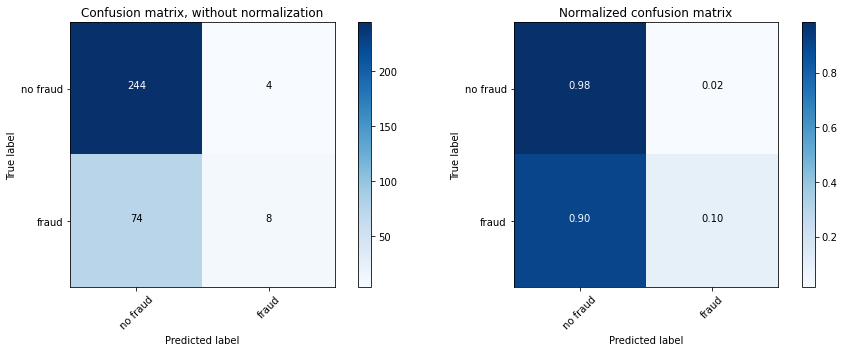

In [37]:
# Compute confusion matrix
class_names = ['no fraud', 'fraud']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13, 5))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


plt.show()

<font color='red'>**The confusion matrix highlights how the accuracy score can be misleading!**</font>

While our classifier labels 98% of cases correctly as non-fraudulent, it only labels 10% correctly as fraud. It seems that the classifier predicts "non-fraudulent" most of the time. On a balanced data set, this would lead to a low acccuracy score. But since the data is imbalanced (77% non-fraudulent vs. 23% fraudulent), guessing "non-fraudulent" still means labeling a high proportion of claims correctly. 

### Area under the curve (AUC)

A better way of judging model performance is by calculating the Area Under the Curve (AUC) and plotting a ROC curve (Receiver Operating Characteristic). 

In order to obtain the AUC, we calculate the False Positive Rate (fpr), the True Positive Rate (tpr) and the treshhold. With these values, we can calcualte the AUC score:

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])
roc_auc = auc(fpr, tpr)
print("AUC score on Testing: " + str(roc_auc))

AUC score on Testing: 0.6191237214791503


### ROC curve

We plot the ROC curve. The black dotted line represents the performance of a random pick (flipping a coin). Our model (blue line) runs above this base line, but only slightly. Using the model is better than flipping a coin, but there is still room for improvement.

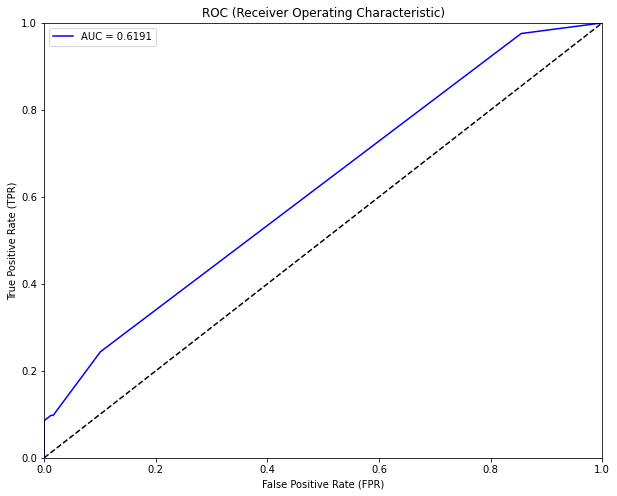

In [39]:
fig, axs = plt.subplots(1,1, figsize=(10,8))

plt.title('ROC (Receiver Operating Characteristic)')
plt.plot(fpr, tpr, 'b', label='AUC = %0.4f'% roc_auc)
plt.legend(loc='best')
plt.plot([0,1],[0,1],color='black', linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)');

## Summary

In this tutorial we learned how to:
- import data
- visualize data to gain a more intuitive understanding of it 
- clean/pre-process data (remove unnecessary features, one-hot encoding)
- split data into training and testing
- build a simple decision tree model 
- evaluate model performance

However, we skipped some important steps that will be covered in the next lectures and tutorials:
- the issue of class imbalances and how to address them (rebalancing)
- different classification algorithms (SVM, Logistic Regression, etc.)
- additional model evaluation tools to decide which model should be deployed in practice